In [1]:
import sympy as sy
import sympy.physics.mechanics as me

# 1質点
## 運動方程式を導出

In [3]:
N = me.ReferenceFrame('N')

In [12]:
Po1 = me.Point("Po1")
m1 = sy.Symbol("m1")

x1 = me.dynamicsymbols("x1")
t = sy.Symbol('t')
vx1 = sy.diff(x1, t)
Po1.set_vel(N, vx1*N.x)

Pa1 = me.Particle("Pa1", Po1, m1)

In [18]:
L = me.Lagrangian(N, Pa1)

In [22]:
k1, l1 = sy.symbols("k1 l1")
forcelist = [(Po1, -k1*(x1-l1)*N.x)]
LM = me.LagrangesMethod(L, qs=[x1], forcelist=forcelist, frame=N)

In [23]:
eom = LM.form_lagranges_equations()
eom

Matrix([[k1*(-l1 + x1(t)) + m1*Derivative(x1(t), (t, 2))]])

In [24]:
f = LM.rhs()
f

Matrix([
[Derivative(x1(t), t)],
[-k1*(-l1 + x1(t))/m1]])

## 数値解析

In [28]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

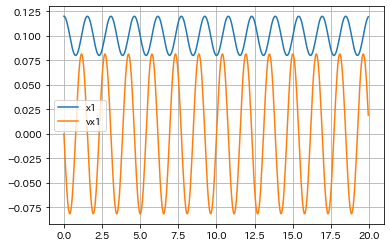

In [37]:
K1 = 5
L1 = 0.10 #[m]
M1 = 0.3 #[kg]

def func(state, t):
    dXdt = np.zeros_like(state)
    
    dXdt[0] = state[1]
    dXdt[1] = - K1*(-L1+state[0])/M1
    
    return dXdt

## 初期値
x1 = 0.12 #[m]
vx1 = 0 #[m/s]
state = [x1, vx1]

dt = 0.05
t = np.arange(0,20, dt)

sol = odeint(func, state, t)

fig, ax = plt.subplots()
ax.plot(t, sol[:,0], label="x1")
ax.plot(t, sol[:,1], label="vx1")
ax.legend()
ax.grid()
plt.show()

## アニメ

In [38]:
import matplotlib.animation as animation

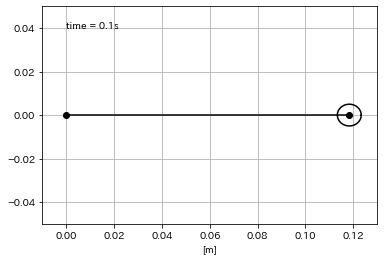

In [92]:
fig, ax = plt.subplots()
i = 2

def update_fig(i):
    plt.cla()
    
    radius = 0.005

    # バネ1
    ax.plot([0,sol[i,0]], [0,0], "o-k")

    # 質点1
    angle = np.deg2rad(np.arange(0,360)) #[rad]
    circle_x = radius*np.cos(angle)
    circle_y = radius*np.sin(angle)
    ax.plot(circle_x+sol[i,0], circle_y, "-k")

    ax.set_xlabel("[m]")
    ax.set_xlim(0-radius*2,max(sol[:,0])+radius*2)
    ax.set_ylim(-0.05,0.05)
    ax.grid()

    ax.text(0,0.04, "time = %.1fs" % (i*dt))

update_fig(i)
plt.show()

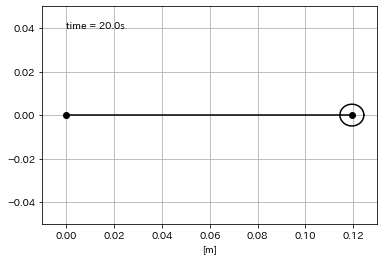

In [86]:
fig, ax = plt.subplots()
interval = dt*1000
anim = animation.FuncAnimation(fig, update_fig, frames=len(sol), interval=interval)
anim.save("バネ1質点.gif", writer=animation.PillowWriter(fps=1000/interval))

# 2質点

In [97]:
N = me.ReferenceFrame('N')

p = me.dynamicsymbols("p")
qs = sy.Matrix([x1, p])

Po1 = me.Point("Po1")
m1 = sy.Symbol("m1")
x1 = me.dynamicsymbols("x1")
t = sy.Symbol('t')
vx1 = sy.diff(x1, t)
Po1.set_vel(N, vx1*N.x)
Pa1 = me.Particle("Pa1", Po1, m1)

Po2 = me.Point("Po2")
m2 = sy.Symbol("m2")
x2 = x1 + p
vx2 = sy.diff(x2, t)
Po2.set_vel(N, vx2*N.x)
Pa2 = me.Particle("Pa2", Po2, m2)

In [98]:
L = me.Lagrangian(N, Pa1, Pa2)

In [100]:
k1, l1 = sy.symbols("k1 l1")
k2, l2 = sy.symbols("k2 l2")
forcelist = [(Po1, -k1*(x1-l1)*N.x), (Po2, -k2*(p-l2)*N.x)]
LM = me.LagrangesMethod(L, qs=qs, forcelist=forcelist, frame=N)

In [104]:
eom = sy.simplify(LM.form_lagranges_equations())
eom

Matrix([
[-k1*(l1 - x1(t)) - k2*(l2 - p(t)) + m1*Derivative(x1(t), (t, 2)) + m2*(Derivative(p(t), (t, 2)) + Derivative(x1(t), (t, 2)))],
[                                                 -k2*(l2 - p(t)) + m2*(Derivative(p(t), (t, 2)) + Derivative(x1(t), (t, 2)))]])

In [103]:
f = sy.simplify(LM.rhs())
f

Matrix([
[                           Derivative(x1(t), t)],
[                            Derivative(p(t), t)],
[                             k1*(l1 - x1(t))/m1],
[-k1*l1/m1 + k1*x1(t)/m1 + k2*l2/m2 - k2*p(t)/m2]])

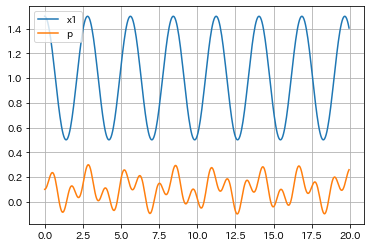

In [112]:
K1 = 5
L1 = 1 #[m]
M1 = 1 #[kg]
K2 = 3
L2 = 0.10 #[m]
M2 = 0.1 #[kg]

def func(state, t):
    dXdt = np.zeros_like(state)
    
    dXdt[0] = state[2]
    dXdt[1] = state[3]
    dXdt[2] = - K1*(-L1+state[0])/M1
    dXdt[3] = (-K1*L1+K1*state[0])/M1 + (K2*L2-K2*state[1])/M2
    
    return dXdt

## 初期値
x1 = L1+0.5 #[m]
p = L2 #[m]
vx1 = 0 #[m/s]
vp = 0 #[m/s]

state = [x1, p, vx1, vp]

dt = 0.05
t = np.arange(0,20, dt)

sol = odeint(func, state, t)

fig, ax = plt.subplots()
ax.plot(t, sol[:,0], label="x1")
ax.plot(t, sol[:,1], label="p")
ax.legend()
ax.grid()
plt.show()

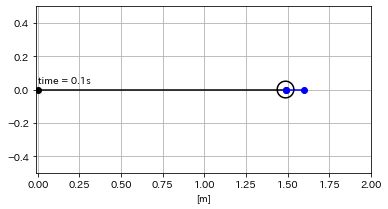

In [139]:
fig, ax = plt.subplots()
i = 2

def update_fig(i):
    plt.cla()

    # バネ1
    ax.plot([0,sol[i,0]], [0,0], "o-k")

    # 質点1
    angle = np.deg2rad(np.arange(0,360)) #[rad]
    radius = M1*0.05
    circle_x = radius*np.cos(angle)
    circle_y = radius*np.sin(angle)
    ax.plot(circle_x+sol[i,0], circle_y, "-k")
    
    # バネ2
    ax.plot([sol[i,0],sol[i,0]+sol[i,1]], [0,0], "o-b")
    
    # 質点2
    radius = M2*0.05
    circle_x = radius*np.cos(angle)
    circle_y = radius*np.sin(angle)
    ax.plot(circle_x+sol[i,0]+sol[i,1], circle_y, "-b")

    ax.set_xlabel("[m]")
    ax.set_xlim(0-radius*2,2)
    ax.set_ylim(-0.5,0.5)
    ax.grid()
    ax.set_aspect("equal")

    ax.text(0,0.04, "time = %.1fs" % (i*dt))

update_fig(i)
plt.show()

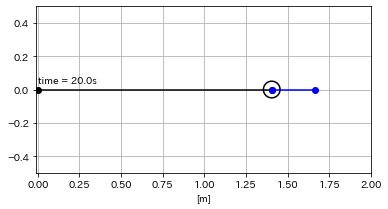

In [140]:
fig, ax = plt.subplots()
interval = dt*1000
anim = animation.FuncAnimation(fig, update_fig, frames=len(sol), interval=interval)
anim.save("バネ2質点.gif", writer=animation.PillowWriter(fps=1000/interval))